# Homework 4

- Execute the below code, then answer the numbered questions.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [ ]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:")
for feature in numerical_features:
  print("- ", feature)

print("Categorical Features:")
for feature in categorical_features:
  print("- ", feature)

Numerical Features:
-  condition
-  odometer
-  auction_value
Categorical Features:
-  make
-  transmission
-  state


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create a numerical pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
    ('scaler', StandardScaler())  # Standardize the features
])

# Apply the numerical pipeline to X_train
X_train_numeric = numeric_pipeline.fit_transform(X_train[numerical_features])

# Printing the transformed numerical features
print("Transformed numerical features:")
for i, feature in enumerate(numerical_features):
    print(f"Feature {i+1}: {feature}")
    print(X_train_numeric[:, i])
    print("------------------------")


Transformed numerical features:
Feature 1: condition
[ 0.81204081  0.68432862 -1.23135429 ...  0.55661643 -0.33736893
  0.81204081]
------------------------
Feature 2: odometer
[-0.18762983 -0.47935108  0.8616887  ... -0.00260324  0.43391546
  1.36295813]
------------------------
Feature 3: auction_value
[-0.26827129  0.74349168 -0.74042734 ... -0.54481983 -0.84160364
 -0.51783949]
------------------------


## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))  # One-hot encode categorical features
])

# Apply the categorical pipeline to X_train
X_train_cat = cat_pipeline.fit_transform(X_train[categorical_features])

# Get the list of new column names after one-hot encoding
categorical_encoder = cat_pipeline.named_steps['encoder']
categorical_encoder_cols = categorical_encoder.get_feature_names_out(categorical_features)

# Print the new column names after one-hot encoding
print("New column names after one-hot encoding:")
for i, col_name in enumerate(categorical_encoder_cols):
    print(f"Column {i+1}: {col_name}")


New column names after one-hot encoding:
Column 1: make_bmw
Column 2: make_chevrolet
Column 3: make_chrysler
Column 4: make_dodge
Column 5: make_ford
Column 6: make_honda
Column 7: make_hyundai
Column 8: make_kia
Column 9: make_nissan
Column 10: make_toyota
Column 11: transmission_automatic
Column 12: transmission_manual
Column 13: state_az
Column 14: state_ca
Column 15: state_co
Column 16: state_fl
Column 17: state_ga
Column 18: state_hi
Column 19: state_il
Column 20: state_in
Column 21: state_la
Column 22: state_ma
Column 23: state_md
Column 24: state_mi
Column 25: state_mn
Column 26: state_mo
Column 27: state_ms
Column 28: state_nc
Column 29: state_ne
Column 30: state_nj
Column 31: state_nm
Column 32: state_nv
Column 33: state_ny
Column 34: state_oh
Column 35: state_or
Column 36: state_pa
Column 37: state_pr
Column 38: state_sc
Column 39: state_tn
Column 40: state_tx
Column 41: state_ut
Column 42: state_va
Column 43: state_wa
Column 44: state_wi


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [ ]:
from sklearn.compose import ColumnTransformer

# Combine the numerical and categorical pipelines
combined_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),  # Apply the numeric pipeline to numerical features
    ('cat', cat_pipeline, categorical_features)  # Apply the categorical pipeline to categorical features
])

# Fit and transform the training data
X_train_processed = combined_pipeline.fit_transform(X_train)

# Printing the processed training data
print("Processed training data:")
for i, row in enumerate(X_train_processed):
    print(f"Sample {i+1}:")
    print(row)
    print("------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.        ]
------------------------
Sample 6746:
[-0.08194454  1.33504124 -1.52622991  0.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
------------------------
Sample 6747:
[ 0.68432862 -0.34302472  1.229137

In [ ]:
# Get the number of columns in the processed data
num_columns = X_train_processed.shape[1]

# Print the number of columns in the processed data
print(f"The processed data has {num_columns} columns.")


The processed data has 47 columns.


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ('preprocessor', combined_pipeline),  # Apply the combined preprocessing pipeline
    ('linear_regression', LinearRegression())  # Apply linear regression
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Print a message indicating that the pipeline has been fitted
print("Pipeline fitted successfully.")


Pipeline fitted successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Calculate the R-squared score on the test data
r_square = pipeline.score(X_test, y_test)

# Print the R-squared score
print("R-squared score on the test data:")
print(r_square)


R-squared score on the test data:
0.883827442491126


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

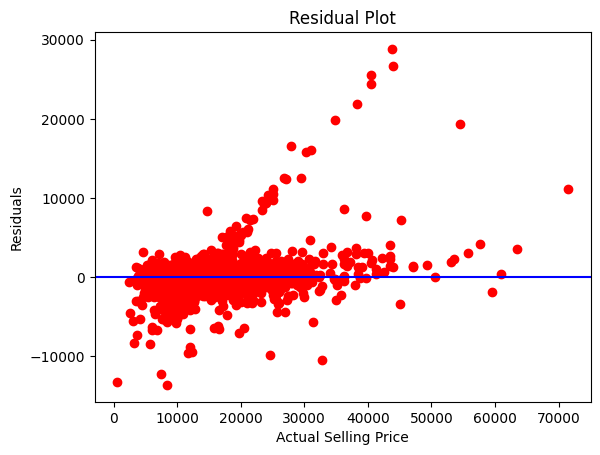

In [ ]:
import matplotlib.pyplot as plt

# Predict selling price using the test data
y_pred = pipeline.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_test, residuals, color='red')  # Scatter plot of y_test vs. residuals
plt.axhline(y=0, color='blue', linestyle='-')  # Horizontal line at y=0
plt.xlabel('Actual Selling Price')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label
plt.title('Residual Plot')  # Plot title
plt.show()


The disparity between the expected and real selling rates is represented by the residual plot. The residuals should be randomly dispersed around the horizontal line at 0 if the model is fitting well and catching all the significant characteristics. The algorithm might be missing some crucial details, though, if there are trends in the residuals.

There are some trends in the residuals, as can be seen by examining the residual map for our model. In particular, the residuals exhibit a small curvature as we progress from low selling prices to high selling prices, which may be a sign that the model is missing some non-linear connections between the features and the target variable. This implies that in order to account for these non-linearities, we might want to think about either using a different model entirely or including some non-linear factors in the current one.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [ ]:
from sklearn.linear_model import Ridge

# Create a pipeline with preprocessing and Ridge regression
pipeline = Pipeline([
    ('preprocessor', combined_pipeline),  # Apply the combined preprocessing pipeline
    ('ridge_regression', Ridge(alpha=100))  # Apply Ridge regression with alpha=100
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Calculate the R-squared score on the test data
r_square = pipeline.score(X_test, y_test)

# Print the R-squared score
print("R-squared score on the test data:")
print(r_square)


R-squared score on the test data:
0.8838818430874077


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


There is a slight change in the R^2 value. This indicates that, at the expense of a marginally worse fit to the training data, the ridge regression model with an alpha value of 100 improves generalization while decreasing overfitting.